In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/andersonara/datasets/master/cosmetics.csv')

In [38]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [39]:
df_1 = df.groupby('Label')['Brand'].count().reset_index().sort_values(by='Brand').rename(columns={'Brand':'Qtd'})

<AxesSubplot:xlabel='Label', ylabel='Qtd'>

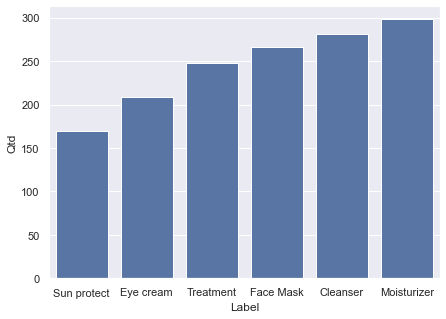

In [40]:
plt.figure(figsize=(7, 5))
sns.barplot(data = df_1 , x='Label',y='Qtd',color='b')

<AxesSubplot:xlabel='Label', ylabel='Price'>

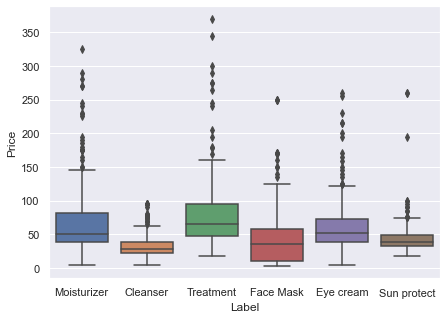

In [41]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df,y='Price',x='Label')

In [27]:
df['Price'].mean()

55.58423913043478

In [28]:
df['Rank'].mean()

4.153260869565226

In [29]:
df.columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [32]:
colunas =['Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive']

In [34]:
for i in colunas:
    x = df[i].mean()
    print(f'O percentual da coluna {i} é: {x}')

O percentual da coluna Combination é: 0.65625
O percentual da coluna Dry é: 0.6141304347826086
O percentual da coluna Normal é: 0.6521739130434783
O percentual da coluna Oily é: 0.6073369565217391
O percentual da coluna Sensitive é: 0.5135869565217391


In [64]:
df_medias.to_csv('graficooo.csv')

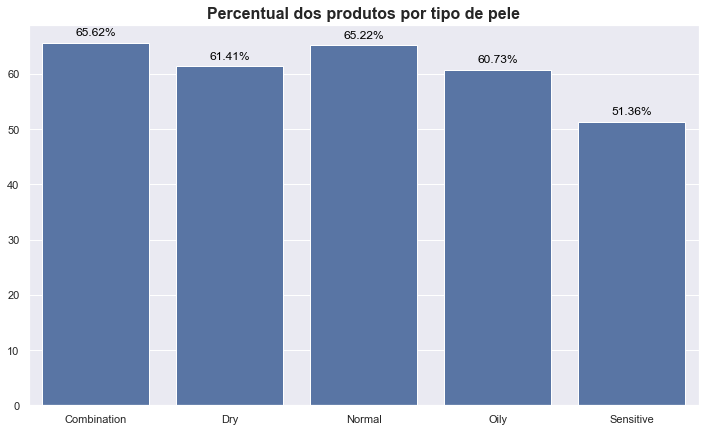

In [63]:
# Definindo o estilo e a paleta de cores
sns.set(style="darkgrid")

# Calculando a média de cada coluna e criando um DataFrame temporário
medias = [df[i].mean() * 100 for i in colunas] 
df_medias = pd.DataFrame({'Coluna': colunas, 'Média': medias})

# Ordenando as colunas pelo valor da média
df_medias = df_medias.sort_values(by='Média', ascending=False)
plt.figure(figsize=(12, 7))
ax = sns.barplot(data = df_medias.sort_values(by='Média', ascending=False), x=colunas, y=medias,color = 'b')

# Adicionando título e rótulos
ax.set_title('Percentual dos produtos por tipo de pele', fontsize=16, weight='bold')


# Adicionando as médias no topo de cada barra
for p, media in zip(ax.patches, medias):
    ax.annotate(f'{media:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.show()

In [53]:
df_medias

,Coluna,Média
0,Combination,0.656250
2,Normal,0.652174
1,Dry,0.614130
3,Oily,0.607337
4,Sensitive,0.513587


<AxesSubplot:xlabel='Rank', ylabel='Normal'>

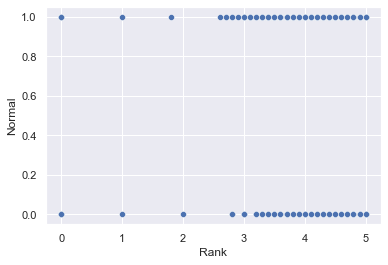

In [36]:
sns.scatterplot(data=df,x='Rank',y='Normal')

In [47]:
df.to_csv('base_cosmetico.csv')

In [46]:
df['Rank'] = df['Rank'].astype(str).str.replace('.',',')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1868\2752923405.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Rank'] = df['Rank'].astype(str).str.replace('.',',')
